In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../') 
from utils import Utils
utils_obj = Utils()
df = pd.read_csv("data-tagging-with-found-labels.tsv", sep='\t')
df

,doc,tag,label
0,I paid for my tyres and booked an appointment ...,1,None
1,"Very easy to use website, a good range of tyre...",11,None
2,"Booked and payed for 2 tyres, selected a date ...",5,ease of booking
3,I got tyres and the pressure was wrong I had t...,5,ease of booking
4,AVOID [REDACTED] their mobile fitting service....,11,None
...,...,...,...
5201,Having originally booked and paid for my tyre ...,11,None
5202,I've been a customer for quite a few years and...,11,None
5203,"Good prices on the internet, fitting available...",9,garage service
5204,I’ve used [REDACTED] a few times now and my ex...,14,mobile fitter


In [4]:
label_freq = utils_obj.get_unique_topics_freq(df)

['None', 'ease of booking', 'mobile fitter', 'garage service', 'delivery punctuality', 'value for money', 'booking confusion', 'location', 'wait time']


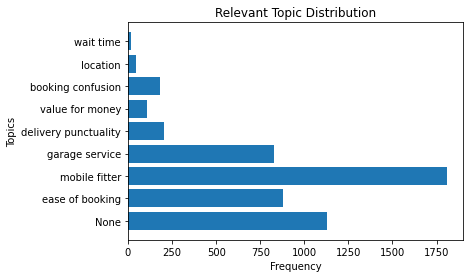

In [5]:
print(  list(label_freq.keys())  )
plt.barh(list(label_freq.keys()), list(label_freq.values()) )

plt.title('Relevant Topic Distribution')
plt.ylabel('Topics')
plt.xlabel('Frequency')
plt.show()

In [21]:
doc_label_binary_dict, unique_labels = utils_obj.prepare_multilabel_classification_data(df)
print(unique_labels)

['delivery punctuality', 'mobile fitter', 'value for money', 'wait time', 'garage service', 'ease of booking', 'booking confusion', 'None', 'location']


In [22]:
doc_label_binary_dict

{'I paid for my tyres and booked an appointment for next day to have them fitted. A few hours later I got a email to say my appointment had been rescheduled for a week later. I couldn’t wait a week so I asked for a refund and purchased my tyres next day from elsewhere at a cheaper price.': [0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0],
 'Very easy to use website, a good range of tyres with helpful comparisons between comparable options., excellent selection of local garages to fit tyres. Excellent service all round and competitive prices. Recommended.': [0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0],
 'Booked and payed for 2 tyres, selected a date and time that was available (according to the website). Then got an email saying that date and time wasn’t available and that I’d have to rebook. Requested a new time via email the same day. Got no response to emails for 3 days. Rang customer service, got told they’d call me back - never did. I called again a day later, trying to sort out the book

In [24]:
final_dict = {
    "text":[],
    "delivery punctuality":[],
    "mobile fitter":[],
    "value for money":[],
    "wait time":[],
    "garage service":[],
    "ease of booking":[],
    "booking confusion":[],
    "None":[],
    "location":[]
}
for key in doc_label_binary_dict:
    final_dict["text"].append(key)
    
    for i,j in zip(unique_labels,doc_label_binary_dict[key]):
        final_dict[i].append(j)


In [25]:
df_final = pd.DataFrame.from_dict(final_dict)
df_final

,text,delivery punctuality,mobile fitter,value for money,wait time,garage service,ease of booking,booking confusion,None,location
0,I paid for my tyres and booked an appointment ...,0,0,0,0,0,1,0,1,0
1,"Very easy to use website, a good range of tyre...",0,1,0,0,1,0,0,1,0
2,"Booked and payed for 2 tyres, selected a date ...",0,1,0,0,0,1,1,1,0
3,I got tyres and the pressure was wrong I had t...,0,0,0,0,0,1,0,0,0
4,AVOID [REDACTED] their mobile fitting service....,1,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
3049,Good price and fast efficient fitting,0,0,0,0,1,0,0,0,0
3050,"Such an easy service to use,you can choose fro...",0,0,0,0,0,1,0,0,0
3051,The price was OK the fitters were great no iss...,1,0,0,0,0,0,0,0,0
3052,I've been a customer for quite a few years and...,0,0,0,0,0,0,0,1,0


In [27]:
df_final.to_csv("classification_data.tsv", sep='\t', index=False)